In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [4]:
!pip install matplotlib

In [5]:
df = pd.read_csv('height-weight.csv')

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
df.shape

(23, 2)

Text(0, 0.5, 'height')

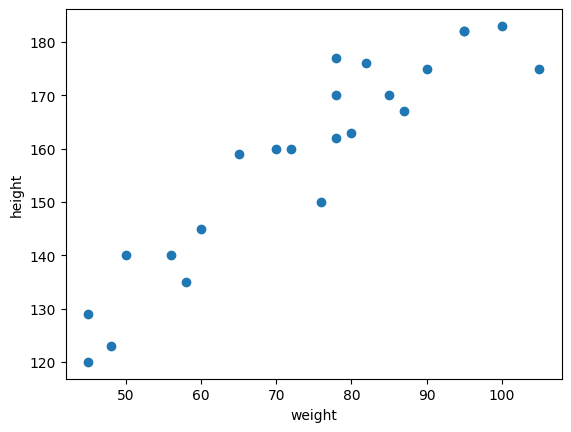

In [8]:
##scatter plot
plt.scatter(x = df['Weight'], y = df['Height'])
plt.xlabel("weight")
plt.ylabel("height")
##can omit x and y

In [9]:
##finding correlation 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


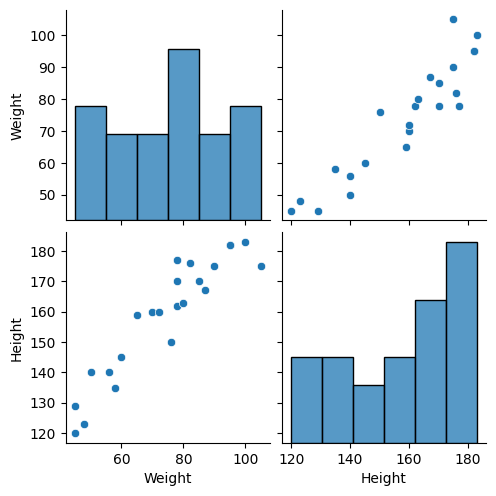

In [10]:
sns.pairplot(df)

In [11]:
#the data is linearly correlated to linear regression will work well with it

## independent feature should be in the form of a dataframe or a 2 dimensional array
## using single [] gives a series type of data
## using double [[]] gives a pandas dataframe

In [12]:
##dividing features :independent, dependent

X = df[['Weight']]
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [13]:
y = df['Height'] 
y.head()


0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

## dependent feature can be in series or 1d form
## single output feature so need not worry about it being a dataframe

In [14]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42 )

#### test_size : float or int, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.

random_state : int, RandomState instance or None, default=None
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary <random_state>.

In [21]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(17, 1) (17,) (6, 1) (6,)


## STANDARDIZATION (apply to all individual input features not the output feature)
### MEAN = 0, STD = 1
### FORMULA = (x(i) - mean)/ std


In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### USE FIT_TRANSFORM FOR TRAINING DATA AND TRANSFORM FOR TEST DATA

#### 1. The fit_transform method calculates the necessary parameters (like mean and standard deviation for standard scaling) from the training data and then transforms the training data accordingly.
#### 2. The transform method only applies the parameters calculated from the training data to the test data without recalculating them. (DONE TO PREVENT DATA LEAKAGE)

In [26]:
print(X_train)
print("\n")
print(X_test)

[[-0.87662801]
 [ 1.66773133]
 [ 0.33497168]
 [-1.48242785]
 [ 1.36483141]
 [-1.6641678 ]
 [-0.75546804]
 [-0.1496682 ]
 [ 0.21381171]
 [-1.36126788]
 [-0.99778797]
 [-0.02850823]
 [ 1.06193149]
 [ 0.57729161]
 [ 0.75903157]
 [ 0.88019153]
 [ 0.45613165]]


[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


### Applying simple linear regression

In [27]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()  #initialising the object


In [28]:
regression.fit(X_train,y_train)   #expects a 2d array (dataframe) not series (as input)

LinearRegression()

In [29]:
regression

LinearRegression()

In [39]:
print("Slope or Coeffectient or Beta 1 :", regression.coef_)  #this is the slope (beta 1)
print("Intercept or Beta 0 :", regression.intercept_)
#implies that 1 unit movement of weight(y axis) leads to 17.2982057 unit movements in the x axis (height)
# when weight = 0, line meets the y axis at 156.47058823529412

Slope or Coeffectient or Beta 1 : [17.2982057]
Intercept or Beta 0 : 156.47058823529412


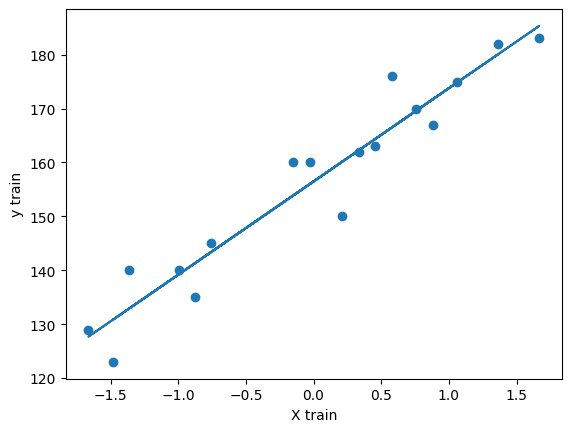

In [41]:
#plot best fit line wrt training data
plt.scatter(X_train, y_train)
plt.xlabel("X train")
plt.ylabel("y train")
plt.plot(X_train, regression.predict(X_train))

In [ ]:
#Prediction for test data
y_pred = regression.predict(X_test)
print(y_pred)


[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


#### y_pred = slope * x_test + intercept

In [45]:
#PERFORMANCE METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse, mae, rmse)

114.84069295228699 9.66512588679501 10.716374991212605


### R-SQUARED
### R^2 = 1 - SSR/SST
### R^2	=	coefficient of determination
### SSR	=	sum of squares of residuals
### SST	=	total sum of squares


In [52]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


### ADJUSTED R- SQUARE
### Adjusted R2= 1 - [(1-R2)*(n-1) / (n-k-1)]
#### R  = the R-squared value (the proportion of variance explained by the model)
#### n = the total number of observations
#### k = the number of independent variables (predictors) in the model

In [54]:
#ADJUSTED R SQUARE
1 - ((1 - score) * (len(y_test)-1)) / (len(y_test) - X_test.shape[1] - 1)

0.6701033397476595

In [58]:
#USING OLS LINEAR REGRESSION
!pip install statsmodels
import statsmodels.api as sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.9 MB/s eta 0:00:0000:0100:01


In [59]:
model = sm.OLS(y_train, X_train).fit()

In [60]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [61]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 13 Nov 2024   Prob (F-statistic):                       0.664
Time:                        00:04:43   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/kritika/Desktop/Codes/ML/Basics/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
##coeff value is similar

In [ ]:
#prediction for new data
regression.predict(scaler.transform([[72]]))  #give x_test and the model gives y_test



/Users/kritika/Desktop/Codes/ML/Basics/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [ ]:
### DON'T FORGET TO APPLY STANDARDIZATION TO NEW DATA